## Basic Usage

In [1]:
import numpy as np

np.random.seed(0)

n_pts = 100
noise_lev = 0.1
t = np.linspace(0,1, n_pts)
x,y = np.cos(2*np.pi*t), np.sin(2*np.pi*t)
circ = np.array([[h,v] for h,v in zip(x,y)])
noise = np.random.normal(scale = noise_lev, size = [n_pts,2])
n_circ = circ+noise

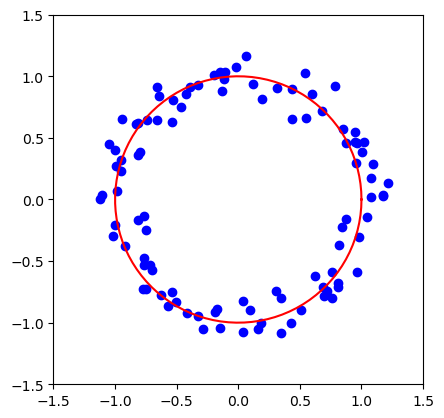

In [2]:
import matplotlib.pyplot as plt

plt.figure()
plt.axes().set_aspect('equal')
plt.plot(circ[:,0], circ[:,1], color = 'red')
plt.scatter(n_circ[:,0], n_circ[:,1], color = 'blue')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.show()
plt.close()

In [3]:
import gudhi as gd

hom_dim = 1
st = gd.RipsComplex(points = n_circ, max_edge_length = 3.).create_simplex_tree(max_dimension = hom_dim + 1)
dgm = st.persistence()

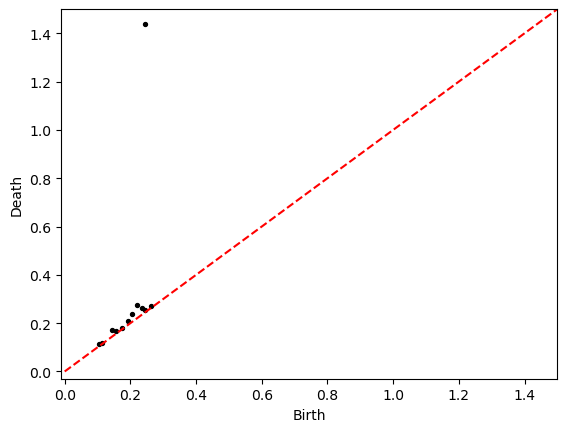

In [4]:
pairs = st.persistence_pairs()
simps = [s for s in filter(lambda x: len(x[0]) == hom_dim +1, pairs)]
pd = np.array([[st.filtration(x),st.filtration(y)] for x,y in simps])

plt.figure()
plt.scatter(pd[:,0],pd[:,1], s=8, color='black')
plt.plot([0,1.5], [0,1.5], ls ='--', color='red')
plt.xlim([-0.01,1.5])
plt.ylim([-0.03,1.5])
plt.xlabel('Birth')
plt.ylabel('Death')
plt.show()
plt.close()

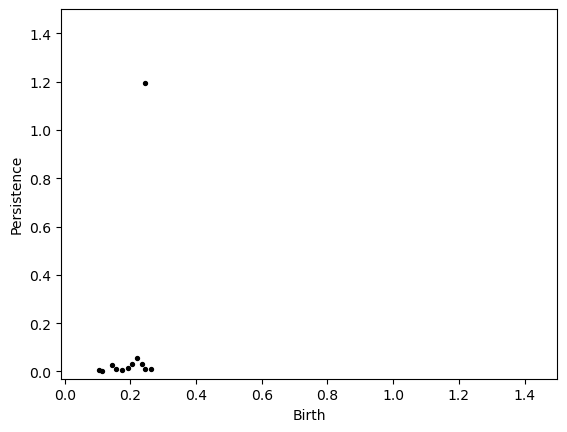

In [5]:
pd_t = np.array([[b,d-b] for b,d in pd])

plt.figure()
plt.scatter(pd_t[:,0],pd_t[:,1], s=8, color='black')
plt.xlim([-0.01,1.5])
plt.ylim([-0.03,1.5])
plt.xlabel('Birth')
plt.ylabel('Persistence')
plt.show()
plt.close()

In [6]:
from bayes_tda import *

mu_pri = np.array([[0.2,1]])
w_pri = np.array([1])
sig_pri = np.array([0.25])

prior_unimodal = Prior(weights = w_pri, mus = mu_pri, sigmas = sig_pri)

In [7]:
prior_unimodal.eval([0.2,1]), prior_unimodal.eval([0.1,0.2]), prior_unimodal.eval([1,-0.1])

(0.6366197723675814, 0.17349912804424186, 0)

In [8]:
mu_u = np.array([[0.15,0.01], [0.2,0.01], [0.25,0.01]])
w_u = np.array([2,2,2])
sig_u = np.array([0.05,0.05,0.05])

prior_unant = Prior(weights=w_u, mus=mu_u, sigmas=sig_u)

In [9]:
sl = 0.3

In [10]:
posterior = Posterior(prior = prior_unimodal,clutter = prior_unant, Dy = pd_t, sy = sl)

In [11]:
b = np.linspace(0,1.4,50)
p = np.linspace(0,1.4,50) 
B,P = np.meshgrid(b,p)

l = list()
for ind in range(len(P)):
    l = list()
    for i in range(len(P)):
        l.append(posterior.eval([B[ind][i], P[ind][i]]))
    I.append(l)
    
l = l / np.max(l)

plt.figure()
plt.style.use('seaborn-bright')
plt.contourf(B,P,l, 20, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Posterior Intensity')
cb = plt.colorbar()
cb.ax.set_title('Scal. Intens.')
plt.gca().set_ylabel('Persistence')
plt.gca().set_xlabel('Birth')
plt.xlim([0,1.4])
plt.ylim([0,1.4])
plt.scatter(pd_t[:,0],pd_t[:,1], s = 20 ,color = 'black')
plt.show()
plt.close()

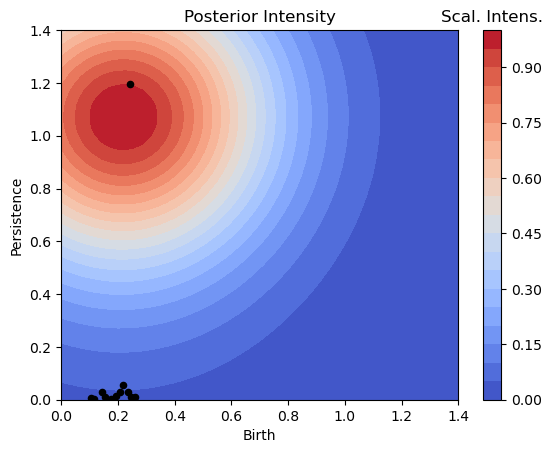

In [12]:
# create grid for computing posterior intensity
b = np.linspace(0,1.4,50)
p = np.linspace(0,1.4,50) 
B,P = np.meshgrid(b,p)

# evaluate posterior intensity over grid
I = list()
for ind in range(len(P)):
    l = list()
    for i in range(len(P)):
        l.append(posterior.eval([B[ind][i],P[ind][i]]))
    I.append(l)
I = I / np.max(I)

# plot posterior intensity
plt.figure()        
plt.style.use('seaborn-bright')
plt.contourf(B,P,I, 20, cmap = 'coolwarm', vmin = 0, vmax = 1)
plt.title('Posterior Intensity')
cb = plt.colorbar()
cb.ax.set_title('Scal. Intens.')
plt.gca().set_ylabel('Persistence')
plt.gca().set_xlabel('Birth')
plt.xlim([0,1.4])
plt.ylim([0,1.4])
plt.scatter(pd_t[:,0],pd_t[:,1], s = 20 ,color = 'black') # overlay persistence diagram
plt.show()
plt.close()

## Machine Learning Example

In [13]:
def noisy_circ(n_pts, noise_lev = 0.1):
    t = np.linspace(0,1,n_pts)
    x,y = np.cos(2*np.pi*t), np.sin(2*np.pi*t)
    circ = np.array([[h,v] for h,v in zip(x,y)])
    noise = np.random.normal(scale=noise_lev, size=[n_pts,2])
    n_circ = circ+noise
    return n_circ

def noisy_oval(n_pts,noise_lev=0.1):
    t = np.linspace(0,1,n_pts)
    x,y = 1.5*np.cos(2*np.pi*t), np.sin(2*np.pi*t)
    oval = np.array([[h,v] for h,v in zip(x,y)])
    noise = np.random.normal(scale=noise_lev, size=[n_pts,2])
    n_oval = oval+noise
    return n_oval

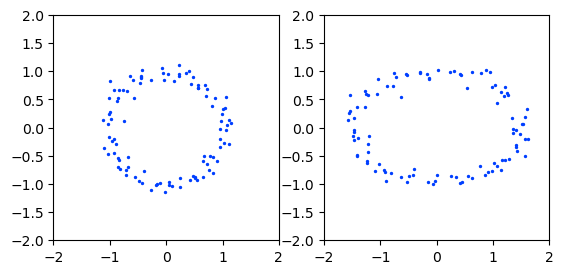

In [14]:
n_pts, data_sz = 100,100
circs,ovals = [noisy_circ(n_pts) for i in range(data_sz)], [noisy_oval(n_pts) for i in range(data_sz)]

c, o = circs[0], ovals[0]
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.scatter(c[:,0],c[:,1],s = 2)
ax1.set_ylim([-2,2])
ax1.set_xlim([-2,2])
ax1.set_aspect('equal')
ax2.scatter(o[:,0],o[:,1],s = 2)
ax2.set_ylim([-2,2])
ax2.set_xlim([-2,2])
ax2.set_aspect('equal')

In [15]:
def pd_tilted(point_cloud, hom_dim=1):
    st = gd.RipsComplex(points=point_cloud, max_edge_length=3.).create_simplex_tree(max_dimension=hom_dim+1)
    dgm = st.persistence()
    pairs = st.persistence_pairs()
    simps = [s for s in filter(lambda x: len(x[0]) == hom_dim+1, pairs)]
    pd = np.array([[st.filtration(x),st.filtration(y)] for x,y in simps])
    pd_t = np.array([[b-d,d] for b,d in pd])
    return pd_t

circ_diags, oval_diags = [pd_tilted(pc) for pc in circs], [pd_tilted(pc) for pc in ovals]

In [16]:
def training_posterior(D,T,prior,unant,lik_cm):
    posts = [Posterior(prior=prior, clutter=unant, Dy=diag, sy=lik_cm) for diag in T]
    pp_log = 0
    for feat in D:
        post_pri = [p.eval(feat) for p in posts]
        pp_log += np.log10(np.sum(np.array(post_pri)))
    return pp_log

In [17]:
mu_pri = np.array([[0.2,1]])
w_pri = np.array([1])
sig_pri = np.array([20])

pri_train = Prior(weights=w_pri, mus=mu_pri, sigmas=sig_pri)
unant = Prior(weights=np.array([0]), mus=mu_pri, sigmas=sig_pri)

In [18]:
n_pts, data_sz = 100,20
circs_val,ovals_val = [noisy_circ(n_pts) for i in range(data_sz)], [noisy_oval(n_pts) for i in range(data_sz)]
c_dgms_val, o_dgms_val = [pd_tilted(pc) for pc in circs_val],[pd_tilted(pc) for pc in ovals_val]

In [19]:
lbf_circs,lbf_ovals = [training_posterior(diag,T=circ_diags,prior = pri_train,unant = unant,lik_cm = 0.1)- \
                     training_posterior(diag,T=oval_diags,prior = pri_train,unant = unant,lik_cm = 0.1) for diag in c_dgms_val],\
                    [training_posterior(diag,T=circ_diags,prior = pri_train,unant = unant,lik_cm = 0.1)- \
                     training_posterior(diag,T=oval_diags,prior = pri_train,unant = unant,lik_cm = 0.1) for diag in o_dgms_val]

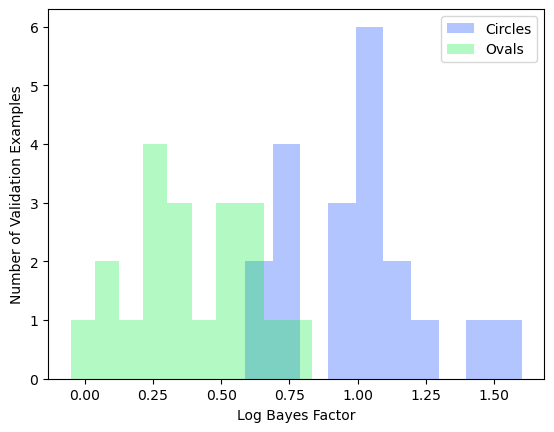

In [20]:
plt.hist(lbf_circs, alpha = 0.3)
plt.hist(lbf_ovals, alpha = 0.3)
plt.legend(['Circles','Ovals'])
plt.xlabel('Log Bayes Factor')
plt.ylabel('Number of Validation Examples')
plt.show()

In [21]:
from sklearn import metrics

class_labels = [0]*data_sz + [1]*data_sz
pred = lbf_ovals + lbf_circs
fpr, tpr, thresholds = metrics.roc_curve(class_labels, pred, pos_label=1)
metrics.auc(fpr,tpr)

0.9725